In [6]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [15]:
# define state graph

class BMIState(TypedDict):
    weight: float  # in kilograms
    height: float  # in meters
    bmi: float    # Body Mass Index
    category: str  # BMI Category

In [8]:
def calculate_bmi(state: BMIState) -> BMIState:
    """Calculate BMI given weight and height."""
    weight = state['weight']
    height = state['height']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2)
    return state



In [16]:
def label_bmi_category(state: BMIState) -> BMIState:
    """Label BMI category based on BMI value."""
    bmi = state['bmi']
    if bmi < 18.5:
        category = "Underweight"
    elif 18.5 <= bmi < 24.9:
        category = "Normal weight"
    elif 25 <= bmi < 29.9:
        category = "Overweight"
    else:
        category = "Obesity"
    state['category'] = category
    return state

In [17]:
# define the state graph
graph=StateGraph(BMIState)
# add nodes to the graph
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("label_bmi_category", label_bmi_category)

#add edges to the graph
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "label_bmi_category")
graph.add_edge("label_bmi_category", END)

# compile the graph
workflow=graph.compile()



In [19]:
initial_state={"weight": 80.0, "height": 1.73, "bmi": 0.0}
final_state=workflow.invoke(initial_state)
print(final_state)

{'weight': 80.0, 'height': 1.73, 'bmi': 26.73, 'category': 'Overweight'}


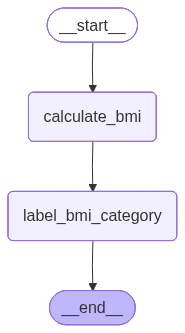

In [18]:
# display the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())
